# 1. Import Dependencies

In [52]:
import gym
import gym_anytrading
from gym_anytrading.envs import ForexEnv
from gym_anytrading.datasets import FOREX_EURUSD_1H_ASK

from stable_baselines.common.vec_env import DummyVecEnv
from stable_baselines import A2C

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

import os

# 2. Bring in Marketwatch GME Data

In [2]:
df = pd.read_csv('data/Download Data - STOCK_US_XNYS_GME.csv')
df.head()

,Date,Open,High,Low,Close,Volume
0,11/11/2021,200.00,208.09,198.15,204.32,"1,079,401"
1,11/10/2021,202.12,207.39,196.50,199.19,"1,309,389"
2,11/09/2021,222.00,223.49,204.44,206.60,"1,845,298"
3,11/08/2021,212.50,225.04,212.01,218.64,"2,157,912"
4,11/05/2021,220.64,221.00,209.01,213.25,"1,810,717"


In [3]:
df['Date'] = pd.to_datetime(df['Date'])
df.dtypes

Date      datetime64[ns]
Open             float64
High             float64
Low              float64
Close            float64
Volume            object
dtype: object

In [4]:
df.head()

,Date,Open,High,Low,Close,Volume
0,2021-11-11,200.00,208.09,198.15,204.32,"1,079,401"
1,2021-11-10,202.12,207.39,196.50,199.19,"1,309,389"
2,2021-11-09,222.00,223.49,204.44,206.60,"1,845,298"
3,2021-11-08,212.50,225.04,212.01,218.64,"2,157,912"
4,2021-11-05,220.64,221.00,209.01,213.25,"1,810,717"


In [5]:
df.set_index('Date', inplace = True)
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2021-11-11,200.00,208.09,198.15,204.32,"1,079,401"
2021-11-10,202.12,207.39,196.50,199.19,"1,309,389"
2021-11-09,222.00,223.49,204.44,206.60,"1,845,298"
2021-11-08,212.50,225.04,212.01,218.64,"2,157,912"
2021-11-05,220.64,221.00,209.01,213.25,"1,810,717"


In [6]:
env = gym.make('stocks-v0', df = df, frame_bound = (5, 100), window_size = 5)#window_size = sonraki 5 değeri arar   frame_bound = 5 den başlayıp 100 e gidicek

In [7]:
env.prices

array([204.32, 199.19, 206.6 , 218.64, 213.25, 217.84, 218.33, 206.99,
       200.09, 183.51, 182.85, 173.51, 177.84, 173.97, 169.8 , 181.71,
       184.52, 186.79, 186.02, 183.28, 183.83, 184.06, 175.82, 178.1 ,
       172.68, 172.12, 171.07, 172.18, 171.36, 176.91, 175.47, 175.92,
       178.6 , 189.48, 185.16, 191.24, 190.14, 189.95, 192.2 , 204.97,
       206.37, 204.52, 199.24, 203.4 , 190.41, 199.18, 198.8 , 199.  ,
       202.75, 213.52, 212.97, 218.24, 209.2 , 204.95, 205.22, 199.65,
       210.29, 164.89, 159.3 , 152.9 , 157.05, 163.55, 163.93, 162.52,
       162.35, 158.78, 159.05, 161.13, 151.77, 153.44, 146.8 , 152.75,
       157.65, 161.12, 164.86, 169.12, 178.54, 183.94, 180.36, 178.85,
       185.81, 191.18, 173.49, 169.04, 166.82, 167.62, 180.06, 189.25,
       191.23, 191.38, 190.66, 199.56, 202.83, 204.36, 214.14, 210.88,
       213.25, 209.51, 212.31, 219.34])

In [8]:
#env.signal_features

# 2. Build Environment

info {'total_reward': -51.51999999999998, 'total_profit': 0.4949757573026533, 'position': 0}


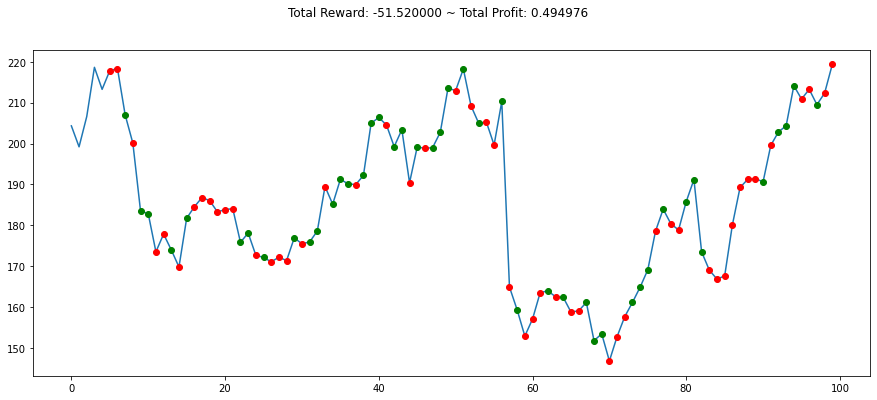

In [9]:
state = env.reset()
while True: 
    action = env.action_space.sample()
    n_state, reward, done, info = env.step(action)
    if done: 
        print("info", info)
        break
        
plt.figure(figsize=(15,6))
plt.cla()
env.render_all()
plt.show()

# 3. Build Environment and Train

In [10]:
df = pd.read_csv('data/Download Data - STOCK_US_XNYS_GME.csv')

In [11]:
env_maker = lambda: gym.make('stocks-v0', df=df, frame_bound=(5,100), window_size=5)
env = DummyVecEnv([env_maker])

In [12]:
model = A2C('MlpLstmPolicy', env, verbose=1) 
model.learn(total_timesteps=1000000)





Instructions for updating:
Use keras.layers.flatten instead.
Instructions for updating:
Please use `layer.__call__` method instead.






Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


---------------------------------
| explained_variance | -195     |
| fps                | 9        |
| nupdates           | 1        |
| policy_entropy     | 0.692    |
| total_timesteps    | 5        |
| value_loss         | 0.00198  |
---------------------------------
----------------------------------
| explained_variance | -7.59e-05 |
| fps                | 340       |
| nupdates           | 100       |
| policy_entropy     | 0.692     |
| total_timesteps    | 500       |
| value_loss         | 175       |
----------------------------------
---------------------------------
| explained_variance | 0.0468   |
| fps                | 

In [15]:
save_path = os.path.join('Training','Saved Models')
A2C_trading = os.path.join(save_path, 'A2C_trading')

model.save(A2C_trading)

info {'total_reward': 0.7299999999999613, 'total_profit': 0.9638218597761822, 'position': 0}


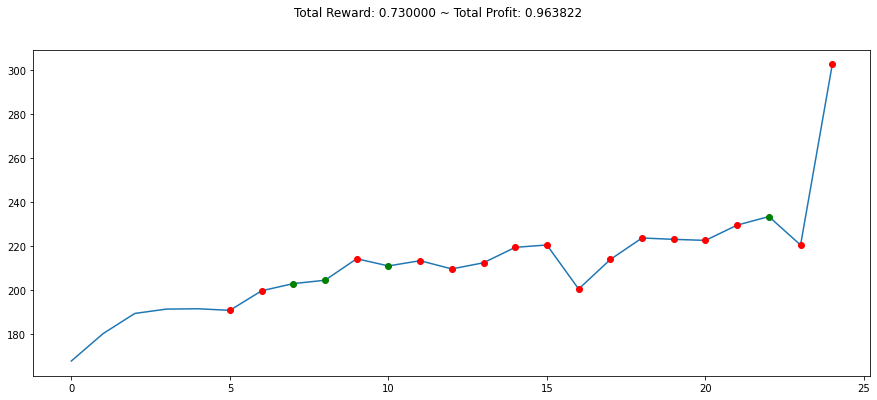

In [16]:
frame_bound=(90,110)
date_list = df['Date'].tolist()[frame_bound[0]-5:frame_bound[1]]

env = gym.make('stocks-v0', df=df, frame_bound=frame_bound, window_size=5)

obs = env.reset()
while True: 
    obs = obs[np.newaxis, ...]
    action, _states = model.predict(obs)
    obs, rewards, done, info = env.step(action)
    if done: 
        print("info", info)
        break
        
plt.figure(figsize=(15,6))
plt.cla()
env.render_all()
plt.show()

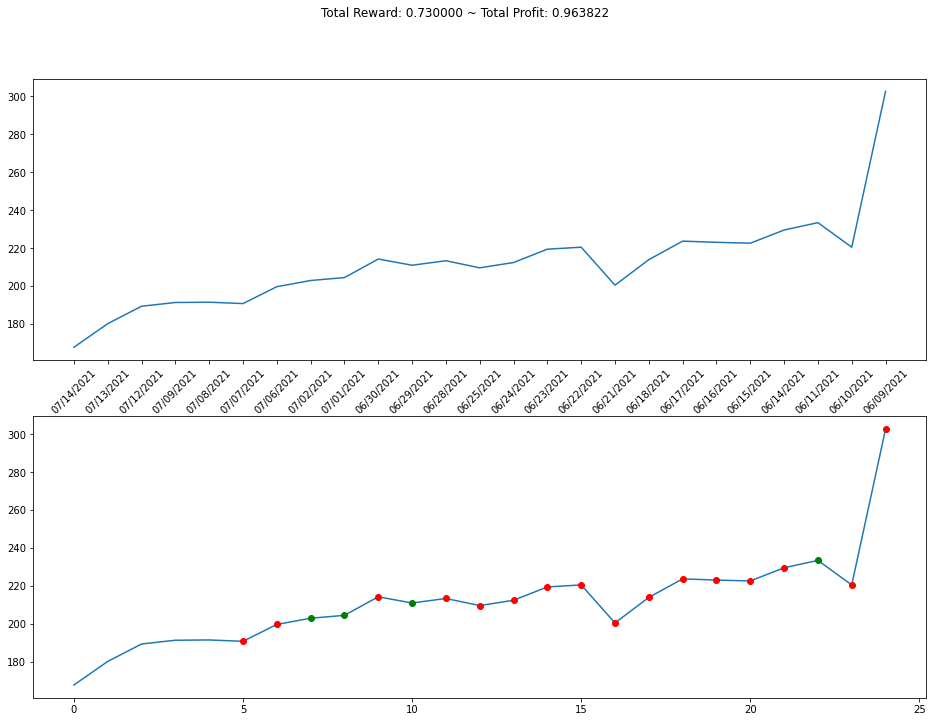

In [43]:
fig, (ax1, ax2) = plt.subplots(2, figsize = (16,10));
fig.suptitle('Vertically stacked subplots');
fig.subplots_adjust(bottom=0.02)
env.render_all();

#date 
ax1.plot(date_list, env.prices);
ax1.tick_params(axis = 'x', labelrotation=45)


In [46]:
df[df['Date'] == '06/09/2021']

,Date,Open,High,Low,Close,Volume
109,06/09/2021,303.12,328.0,291.51,302.56,"13,429,310"


## TradingEnv'i genişletin ve değiştirin
Verileri işlemek ve ortam dışından özellikler çıkarmak istemeniz durumunda, bunu iki yöntemle kolayca yapabilirsiniz:

In [58]:
def my_process_data(env):
    start = env.frame_bound[0] - env.window_size
    end = env.frame_bound[1]
    prices = env.df.loc[:, 'Low'].to_numpy()[start:end]
    signal_features = env.df.loc[:, ['Close', 'Open', 'High', 'Low']].to_numpy()[start:end]
    return prices, signal_features


class MyForexEnv(ForexEnv):
    _process_data = my_process_data


my_env = MyForexEnv(df=FOREX_EURUSD_1H_ASK, window_size=12, frame_bound=(12, len(FOREX_EURUSD_1H_ASK)))

In [60]:
my_env.prices

array([1.05221, 1.05226, 1.05268, ..., 1.20073, 1.19978, 1.19931])

In [61]:
my_env.signal_features

array([[1.05227, 1.05236, 1.05253, 1.05221],
       [1.05282, 1.05227, 1.05426, 1.05226],
       [1.05281, 1.05283, 1.05283, 1.05268],
       ...,
       [1.20096, 1.20139, 1.20144, 1.20073],
       [1.19982, 1.20098, 1.20109, 1.19978],
       [1.20075, 1.19984, 1.2013 , 1.19931]])